<a href="https://colab.research.google.com/github/admiralRus/Mayn/blob/main/%D0%90%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # загружаем библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from urllib.request import urlopen
import scipy.stats as stats

In [ ]:
# Загрузка доп библиотек, функций
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
import scipy.stats

In [ ]:
from pandas_datareader import data as pdr
from datetime import date

In [ ]:
# год по IPO - 2018 г. (20 февраля 2018 г.) Symbol ZEPP

**1. Провести первичный анализ и предобработку датафрейма Nasdaq**

In [ ]:
# загружаем сначала файл
data = pd.read_excel('/content/Nasdaq.xlsx')

In [ ]:
# присваиваем датафрейм
df = pd.DataFrame(data)

In [ ]:
#вывод данных
data

,Unnamed: 0,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Z
0,871,BAM,Brookfield Asset Management Inc. Common Stock,$45.52,-1.670,-3.539%,74720277027,Canada,1925,1563431,Consumer Discretionary,Other Consumer Services,BAM
1,2048,CVR,Chicago Rivet & Machine Co. Common Stock,$28.47,-0.020,-0.07%,27505778,United States,1930,882,Consumer Discretionary,Industrial Specialties,CVR
2,4491,LGL,LGL Group Inc. (The) Common Stock,$11.435,-0.065,-0.565%,61296974,United States,1946,1509,Technology,Industrial Machinery/Components,LGL
3,1526,CET,Central Securities Corporation Common Stock,$35.75,-0.520,-1.434%,974773228,United States,1951,15250,Finance,Finance/Investors Services,CET
4,5166,NBR,Nabors Industries Ltd.,$161.03,-12.920,-7.427%,1515601156,Bermuda,1951,82194,Energy,Oil & Gas Production,NBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,8254,XPDB,Power & Digital Infrastructure Acquisition II ...,$9.81,0.010,0.102%,352546875,United States,2022,243,Industrials,Consumer Electronics/Appliances,XPDB
3901,8256,XPDBW,Power & Digital Infrastructure Acquisition II ...,$0.24,-0.015,-5.882%,0,United States,2022,8100,Industrials,Consumer Electronics/Appliances,XPDBW
3902,8264,XPON,Expion360 Inc. Common Stock,$2.97,-0.230,-7.188%,20167963,United States,2022,70206,Technology,Electronic Components,XPON
3903,8322,ZING,FTAC Zeus Acquisition Corp. Class A Common Stock,$9.88,0.000,0.00%,553658730,United States,2022,506,Industrials,Consumer Electronics/Appliances,ZING


In [ ]:
#выводим информацию о данных
#датасет имеет 3905 строк и 13 колонок
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3905 non-null   int64  
 1   Symbol      3905 non-null   object 
 2   Name        3905 non-null   object 
 3   Last Sale   3905 non-null   object 
 4   Net Change  3905 non-null   float64
 5   % Change    3905 non-null   object 
 6   Market Cap  3905 non-null   int64  
 7   Country     3905 non-null   object 
 8   IPO Year    3905 non-null   int64  
 9   Volume      3905 non-null   int64  
 10  Sector      3905 non-null   object 
 11  Industry    3905 non-null   object 
 12  Z           3905 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 396.7+ KB


In [ ]:
#проверим минимальные, средние и максимальные значения в датасете в столбцах
data.describe ()

,Unnamed: 0,Net Change,Market Cap,IPO Year,Volume
count,3905.000000,3905.000000,3.905000e+03,3905.000000,3.905000e+03
mean,4170.461460,-0.991582,5.754744e+09,2013.071703,5.780370e+05
std,2377.129162,4.169152,6.353889e+10,10.522540,2.639760e+06
min,0.000000,-170.985000,0.000000e+00,1925.000000,1.000000e+00
25%,2191.000000,-0.730000,3.427910e+07,2007.000000,9.897000e+03
50%,4181.000000,-0.170000,2.704117e+08,2018.000000,7.495700e+04
75%,6236.000000,-0.010000,1.165274e+09,2021.000000,3.249490e+05
max,8356.000000,7.380000,2.330135e+12,2022.000000,6.188427e+07


In [ ]:
#проверка на пропуски True пропуски, False - непропуски
data.isnull()

,Unnamed: 0,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Z
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,False,False,False,False,False,False,False,False,False,False,False,False,False
3901,False,False,False,False,False,False,False,False,False,False,False,False,False
3902,False,False,False,False,False,False,False,False,False,False,False,False,False
3903,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# поиск дубликатов
# дубликатов и пропусков датасете нет
duplicate = df.duplicated()
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
3900    False
3901    False
3902    False
3903    False
3904    False
Length: 3905, dtype: bool

In [ ]:
data = data.dropna()

In [ ]:
data

,Unnamed: 0,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Z
0,871,BAM,Brookfield Asset Management Inc. Common Stock,$45.52,-1.670,-3.539%,74720277027,Canada,1925,1563431,Consumer Discretionary,Other Consumer Services,BAM
1,2048,CVR,Chicago Rivet & Machine Co. Common Stock,$28.47,-0.020,-0.07%,27505778,United States,1930,882,Consumer Discretionary,Industrial Specialties,CVR
2,4491,LGL,LGL Group Inc. (The) Common Stock,$11.435,-0.065,-0.565%,61296974,United States,1946,1509,Technology,Industrial Machinery/Components,LGL
3,1526,CET,Central Securities Corporation Common Stock,$35.75,-0.520,-1.434%,974773228,United States,1951,15250,Finance,Finance/Investors Services,CET
4,5166,NBR,Nabors Industries Ltd.,$161.03,-12.920,-7.427%,1515601156,Bermuda,1951,82194,Energy,Oil & Gas Production,NBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,8254,XPDB,Power & Digital Infrastructure Acquisition II ...,$9.81,0.010,0.102%,352546875,United States,2022,243,Industrials,Consumer Electronics/Appliances,XPDB
3901,8256,XPDBW,Power & Digital Infrastructure Acquisition II ...,$0.24,-0.015,-5.882%,0,United States,2022,8100,Industrials,Consumer Electronics/Appliances,XPDBW
3902,8264,XPON,Expion360 Inc. Common Stock,$2.97,-0.230,-7.188%,20167963,United States,2022,70206,Technology,Electronic Components,XPON
3903,8322,ZING,FTAC Zeus Acquisition Corp. Class A Common Stock,$9.88,0.000,0.00%,553658730,United States,2022,506,Industrials,Consumer Electronics/Appliances,ZING


**2. Выбрать случайным образом компанию из списка Nasdaq**

In [ ]:
#выберем номер случайной компании
company = np.random.randint(0, len(data))
data1 = data.iloc[company]
print(data1)

Unnamed: 0                                                 8311
Symbol                                                     ZEPP
Name          Zepp Health Corporation American Depositary Sh...
Last Sale                                               $2.0499
Net Change                                              -0.0301
% Change                                                -1.447%
Market Cap                                            127618390
Country                                                   China
IPO Year                                                   2018
Volume                                                    90427
Sector                                               Technology
Industry                                 Computer Manufacturing
Z                                                          ZEPP
Name: 2092, dtype: object


In [ ]:
# компания  Zepp Health Corporation American Depositary Shares, страна регистрации Китай,
# сектор - технологии, индустрия - спроизводство компьютеров
# год по IPO - 2018 г. (20 февраля 2018 г.)

**3. Оценить степень связи между двумя категориальными переменными: страной и индустрией**

In [ ]:
# используем статистический тест для оценки степени связи между двумя категориальными переменными (критерий Пирсона (хи))
contingency_table = pd.crosstab(df['Country'], df['Industry'])
contingency_table
#одна и таже страна в N-индустрии представлены от 0 до 3 раз, США до 88 раз

Industry,Accident &Health Insurance,Advertising,Aerospace,Agricultural Chemicals,Air Freight/Delivery Services,Aluminum,Apparel,Assisted Living Services,Auto & Home Supply Stores,Auto Manufacturing,...,Specialty Insurers,Steel/Iron Ore,Telecommunications Equipment,Tobacco,Transportation Services,Trucking Freight/Courier Services,Trusts Except Educational Religious and Charitable,Water Sewer Pipeline Comm & Power Line Construction,Water Supply,Wholesale Distributors
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bermuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,1,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cayman Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Chile,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
China,0,2,0,0,3,1,1,0,0,3,...,3,1,1,0,1,0,0,0,0,0


In [ ]:
#расчет критерия хи
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=14138.045163038063, pvalue=0.0, dof=6435, expected_freq=array([[4.60947503e-03, 4.60947503e-02, 2.30473752e-02, ...,
        6.14596671e-03, 7.68245839e-03, 9.21895006e-03],
       [3.07298335e-03, 3.07298335e-02, 1.53649168e-02, ...,
        4.09731114e-03, 5.12163892e-03, 6.14596671e-03],
       [2.30473752e-03, 2.30473752e-02, 1.15236876e-02, ...,
        3.07298335e-03, 3.84122919e-03, 4.60947503e-03],
       ...,
       [7.68245839e-04, 7.68245839e-03, 3.84122919e-03, ...,
        1.02432778e-03, 1.28040973e-03, 1.53649168e-03],
       [3.14980794e-02, 3.14980794e-01, 1.57490397e-01, ...,
        4.19974392e-02, 5.24967990e-02, 6.29961588e-02],
       [2.59590269e+00, 2.59590269e+01, 1.29795134e+01, ...,
        3.46120359e+00, 4.32650448e+00, 5.19180538e+00]]))

In [ ]:
# Т.к. p_value менее 0,05 , то разница между выборками является статистически значимой.

**4. Рассмотреть, как распределены доли рыночной стоимости компаний из этого сектора. Сравнить с распределениями всех остальных секторов**

* **4.1 Рассмотрим, как распределены стоимости компаний сектора Technology**

In [ ]:
df1 = df.rename(columns={"Market Cap": "Market_Cap"}) #уберем пробел в названии колонки Market Cap
df1.set_index('Symbol', inplace=True) #заменим индексы (номера строчек будут Symbol)
sector_Technology = df1[df1["Sector"] == "Technology"] # зададим переменную, чтобы были только строки, где сектор = Technology
#записываем дата, чтобы остались те строчки, в которых значение MarketCap более 0, т.к. наврядли рыночная стоимость компании может быть менее таковой
sector_Technology = sector_Technology[df1.Market_Cap > 0]

<ipython-input-220-28ec2601ae88>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sector_Technology = sector_Technology[df1.Market_Cap > 0]


In [ ]:
#посчитаем количество нужных строк
sector_Technology.count()

Unnamed: 0    455
Name          455
Last Sale     455
Net Change    455
% Change      455
Market_Cap    455
Country       455
IPO Year      455
Volume        455
Sector        455
Industry      455
Z             455
dtype: int64

In [ ]:
#посмотрим минимальную и максимальную рыночную стоимость
print("Минимальная рыночная стоимость:", sector_Technology["Market_Cap"].min())
print("Максимальная рыночная стоимость:", sector_Technology["Market_Cap"].max())

Минимальная рыночная стоимость: 4725351
Максимальная рыночная стоимость: 2330135028532


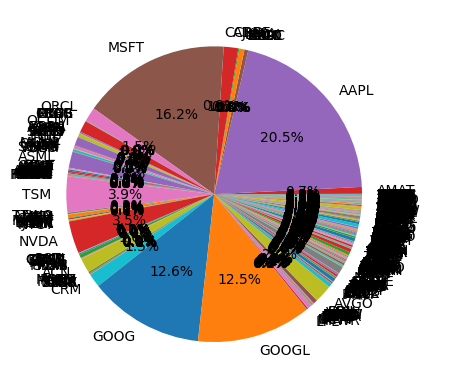

In [ ]:
#круговая диаграмма для Sector
plt.pie(sector_Technology['Market_Cap'], labels=sector_Technology.index, autopct='%1.1f%%')
plt.show()

In [ ]:
#посчитаем % каждой компании от рыночной стоимости,т.к. на круговой диаграмме визуально понятно, но численно не видно
per1 = (sector_Technology["Market_Cap"] / sector_Technology["Market_Cap"].sum()) * 100
#посмотрим минимальную и максимальную рыночную стоимость в процентном соотношении
print("Минимальный %:", per1.min())
print("Максимальный %:", per1.max())

Минимальный %: 4.157495195514368e-05
Максимальный %: 20.501175861902162


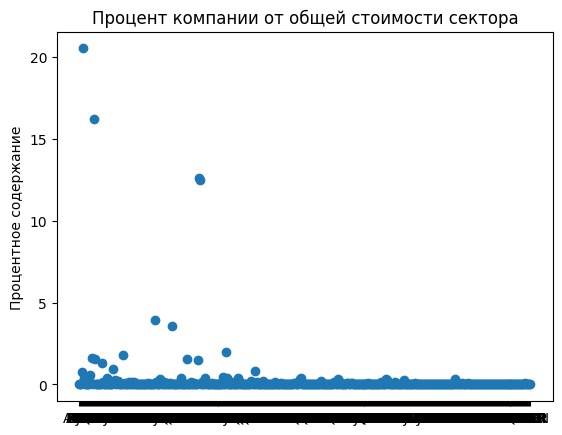

In [ ]:
#просмотр процентного соотношения на диагрмамме
plt.scatter(sector_Technology.index, per1)
plt.ylabel('Процентное содержание')
plt.title('Процент компании от общей стоимости сектора')
plt.show()

In [ ]:
# можно сделать вывод, что оба метода расчета процентроного соотношения верны,
# при этом метод построения круговой диаграммы легче, т.к. не нужны дополнительные вычисления
# процентное соотношение компаний в секторе "Технлогии" изменяется от 0,0004 % до 20.5012 %"

* **4.2 Рассмотрим, как сектор Technology распределен по стоимости компаний в процентном соотношении с другими секторами**

In [ ]:
#проверим на уникальные названия столбец Sector
sectors = df1['Sector'].unique()
sectors

array(['Consumer Discretionary', 'Technology', 'Finance', 'Energy',
       'Industrials', 'Consumer Staples', 'Utilities', 'Health Care',
       'Miscellaneous', 'Real Estate', 'Basic Materials',
       'Telecommunications'], dtype=object)

In [ ]:
#сгруппируем, суммируя по стоимость компаний по сектору
Sum_sector = df1.groupby('Sector')['Market_Cap'].sum()
#посмотр результата
Sum_sector

Sector
Basic Materials             164184240138
Consumer Discretionary     4824210523391
Consumer Staples             67039032211
Energy                      281033560977
Finance                    1615136954534
Health Care                2235871467277
Industrials                 812560196680
Miscellaneous                30681896665
Real Estate                 491051617480
Technology                11365860398584
Telecommunications          265736158688
Utilities                   318910551126
Name: Market_Cap, dtype: int64

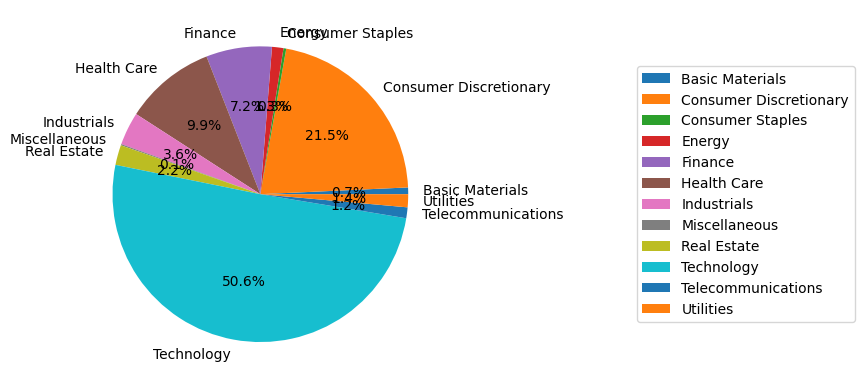

In [ ]:
#построим круговую диаграмму для соотношения суммарной стоимости компаний по отрослям
plt.pie(Sum_sector, labels=Sum_sector.index, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center left')
plt.show()

In [ ]:
#суммарная стоимость компаний сектора Технология в данном датасете максимальная и состовляет 50,6 % от общей рыночной стоимости компаний по секторам
#суммарная стоимость компаний сектора Промышленность составляет всего 3,6 % от общей рыночной стоимости компаний по всем секротам

In [ ]:
#переведем выборку Sum_sector в проценты
per2 = (Sum_sector / Sum_sector.sum()) * 100
per2

Sector
Basic Materials            0.730608
Consumer Discretionary    21.467387
Consumer Staples           0.298319
Energy                     1.250579
Finance                    7.187242
Health Care                9.949466
Industrials                3.615834
Miscellaneous              0.136532
Real Estate                2.185144
Technology                50.577254
Telecommunications         1.182507
Utilities                  1.419129
Name: Market_Cap, dtype: float64

*Таким образом у нас имеется две выборки (4.1 - per1  и 4.2 - per2)*

**Выборка:**
* **per1** - процентное содержание рыночной стоимости компаний в секторе Промышленность
* **per2** - процентное содержание сумманой рыночной стоимости компаний каждого сектора

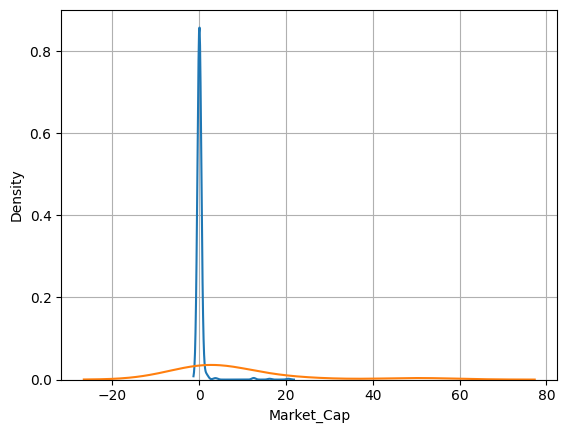

In [ ]:
# по диагрмаме плотности распределения можно сказать, что обе выборки имеют нормально распределение
sns.kdeplot(per1)
sns.kdeplot(per2)
plt.grid() #сетка


In [ ]:
#можно сказать, что обе выборки соответсвуют ЦПТ
#Выполняем тест Шапиро-Уилка:
statistic_1, p_value_1 = shapiro(per1) # выборка per1
statistic_1, p_value_1

(0.11925208568572998, 2.3233528538505467e-41)

In [ ]:
statistic_2, p_value_2 = shapiro(per2) # выборка per1
statistic_2, p_value_2

(0.6123079061508179, 0.00013612282054964453)

In [ ]:
# в обоих случаях p_value меньше уровня значимости (0,05), нулевая гипотеза отвергается по тесту Шапиро-Уилка

In [ ]:
#проведем тест Смирнова-Колмагорова
kstest_result_1 = kstest(per1, 'norm')
kstest_result_2 = kstest(per2, 'norm')
print(kstest_result_1)
print(kstest_result_2)

KstestResult(statistic=0.5000165860061357, pvalue=1.0222253052236029e-105, statistic_location=4.157495195514368e-05, statistic_sign=-1)
KstestResult(statistic=0.6314976300509636, pvalue=3.6372781791347456e-05, statistic_location=1.1825066211342137, statistic_sign=-1)


In [ ]:
#p_value = 0 по методу Колмогорова-Смирнова меньше уровня значимости, значит нулевую гипотезу также можно отвергнуть

In [ ]:
#проведем тест Стьюдента для двух выборок
t_statistic, p_value = stats.ttest_ind(per1, per2)
mean1 = np.mean(per1)
print ('Среднее значение зависимой выборки per1:', mean1)
mean2 = np.mean(per2)
print ('Среднее значение зависимой выборки per2:', mean2)

Среднее значение зависимой выборки per1: 0.21978021978021978
Среднее значение зависимой выборки per2: 8.333333333333334


* **4.3 Рассмотрим проверки на нормальность по секторам**

In [ ]:
#поверка на нормальность распределения Market Cap по секторам (тест Шапиро Уилка)
sectors_1 = []
for i in sectors:
  statistic, p_value = shapiro(data.loc[data.Sector == i]['Market Cap'])
  if p_value > 0.05:
    sectors_1.append(f"Сектор {i}, p_value={p_value}, нормальное распределение")
  else:
    sectors_1.append(f"Сектор {i}, p_value={p_value}, ненормальное распределение")
sectors_1

['Сектор Consumer Discretionary, p_value=1.1210387714598537e-44, ненормальное распределение',
 'Сектор Technology, p_value=1.8959568222314775e-42, ненормальное распределение',
 'Сектор Finance, p_value=0.0, ненормальное распределение',
 'Сектор Energy, p_value=3.3253491775711206e-16, ненормальное распределение',
 'Сектор Industrials, p_value=0.0, ненормальное распределение',
 'Сектор Consumer Staples, p_value=4.818725418687109e-10, ненормальное распределение',
 'Сектор Utilities, p_value=3.287119274691941e-12, ненормальное распределение',
 'Сектор Health Care, p_value=0.0, ненормальное распределение',
 'Сектор Miscellaneous, p_value=3.295080546195095e-07, ненормальное распределение',
 'Сектор Real Estate, p_value=6.564034236012585e-20, ненормальное распределение',
 'Сектор Basic Materials, p_value=2.474800794516341e-06, ненормальное распределение',
 'Сектор Telecommunications, p_value=9.142672174888844e-10, ненормальное распределение']

In [ ]:
#среднее значение двух выборок заметно отличается, p-значение слишком мало и близко к нулю (ниже уровня значимости 0,05),
#что говорит о статически значимоом различии между выборками

In [ ]:
#проведем тест Смирнова-Колмагорова
sectors_2 = []
for i in sectors:
  statistic, p_value = kstest(data.loc[data.Sector == i]['Market Cap'], "norm")
  if p_value >= 0.05:
    sectors_2.append(f"Сектор {i}, p_value={p_value}, нормальное распределение")
  else:
    sectors_2.append(f"Сектор {i}, p_value={p_value}, ненормальное распределение")
sectors_2

['Сектор Consumer Discretionary, p_value=0.0, ненормальное распределение',
 'Сектор Technology, p_value=0.0, ненормальное распределение',
 'Сектор Finance, p_value=0.0, ненормальное распределение',
 'Сектор Energy, p_value=2.988963397464307e-113, ненормальное распределение',
 'Сектор Industrials, p_value=9.541278838860554e-227, ненормальное распределение',
 'Сектор Consumer Staples, p_value=7.199139879392241e-44, ненормальное распределение',
 'Сектор Utilities, p_value=7.611224548478098e-36, ненормальное распределение',
 'Сектор Health Care, p_value=0.0, ненормальное распределение',
 'Сектор Miscellaneous, p_value=4.906115377843993e-19, ненормальное распределение',
 'Сектор Real Estate, p_value=4.2086744516955895e-171, ненормальное распределение',
 'Сектор Basic Materials, p_value=7.009877989627876e-12, ненормальное распределение',
 'Сектор Telecommunications, p_value=1.9287031020910955e-23, ненормальное распределение']

In [ ]:
#p_value = 0 по методу Колмогорова-Смирнова меньше уровня значимости, значит нулевую гипотезу также можно отвергнуть

In [ ]:
#сравнение по секторам Манна-Уитни
sectors_3 = []
for i in sectors:
  statistic, p_value = mannwhitneyu(df.loc[df.Sector == "Technology"]["Market Cap"], df.loc[data.Sector == i]["Market Cap"])
  if p_value > 0.05:
    sectors_3.append(f"Сектор {i}, p_value={p_value}, нет статистически значимых различий")
  else:
    sectors_3.append(f"Сектор {i}, p_value={p_value}, есть статистически значимые различия")
sectors_3


['Сектор Consumer Discretionary, p_value=0.0014544124408454586, есть статистически значимые различия',
 'Сектор Technology, p_value=1.0, нет статистически значимых различий',
 'Сектор Finance, p_value=1.7277046155980446e-27, есть статистически значимые различия',
 'Сектор Energy, p_value=0.8042161569818964, нет статистически значимых различий',
 'Сектор Industrials, p_value=5.538283028588966e-66, есть статистически значимые различия',
 'Сектор Consumer Staples, p_value=0.005559331861459693, есть статистически значимые различия',
 'Сектор Utilities, p_value=0.2721013305135652, нет статистически значимых различий',
 'Сектор Health Care, p_value=3.6277970033094886e-23, есть статистически значимые различия',
 'Сектор Miscellaneous, p_value=0.0015343425911495906, есть статистически значимые различия',
 'Сектор Real Estate, p_value=0.8326245965541873, нет статистически значимых различий',
 'Сектор Basic Materials, p_value=0.8813664671354078, нет статистически значимых различий',
 'Сектор Tel

In [ ]:
# в тесте манна уитни  все распределения являются также ненормальными результаты 50% / 50 %

**5. Провести анализ курса акций компании за все время с момента выхода на рынок**

In [ ]:
# загрузим библиотеку
!pip install yfinance
import yfinance as yf

In [ ]:
#определим количество дней
start_day = date.fromisoformat("2018-02-20") # год по IPO - 2018 г. (20 февраля 2018 г.)
end_day = date.today()

In [ ]:
days_btw = (end_day - start_day).days
days_btw

2072

In [ ]:
# загрузим данные о нашей компании с разницей в 1 день
data2 = yf.download(tickers="ZEPP", period="2071d", interval="1d", group_by="column")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-08,12.00,12.00,10.530,11.250,10.881147,5921500
2018-02-09,11.44,11.60,11.000,11.380,11.006886,1690900
2018-02-12,11.43,11.73,11.210,11.210,10.842459,887800
2018-02-13,11.39,11.39,11.100,11.200,10.832787,485100
2018-02-14,11.10,11.26,10.860,11.200,10.832787,373500
...,...,...,...,...,...,...
2023-10-23,1.03,1.07,1.000,1.000,1.000000,68700
2023-10-24,1.08,1.09,1.020,1.030,1.030000,36300
2023-10-25,1.03,1.03,1.010,1.030,1.030000,24100


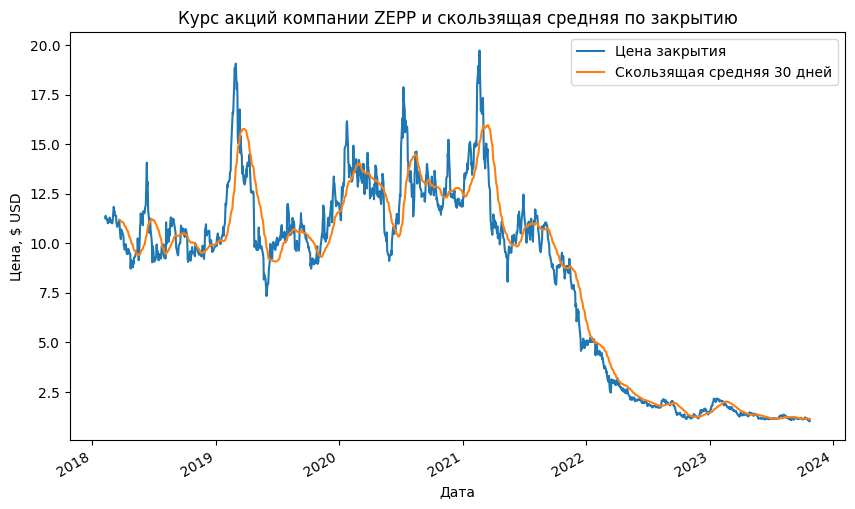

In [ ]:
#проверим как выглядит график акций и скользящая средняя
data2["Close"].plot(figsize=(10,6), label="Цена закрытия")
data2["Close"].rolling(window=30).mean().plot(figsize=(10, 6), label="Скользящая средняя 30 дней")
plt.xlabel('Дата')
plt.ylabel('Цена, $ USD')
plt.title("Курс акций компании ZEPP и скользящая средняя по закрытию")
plt.legend()
plt.show()

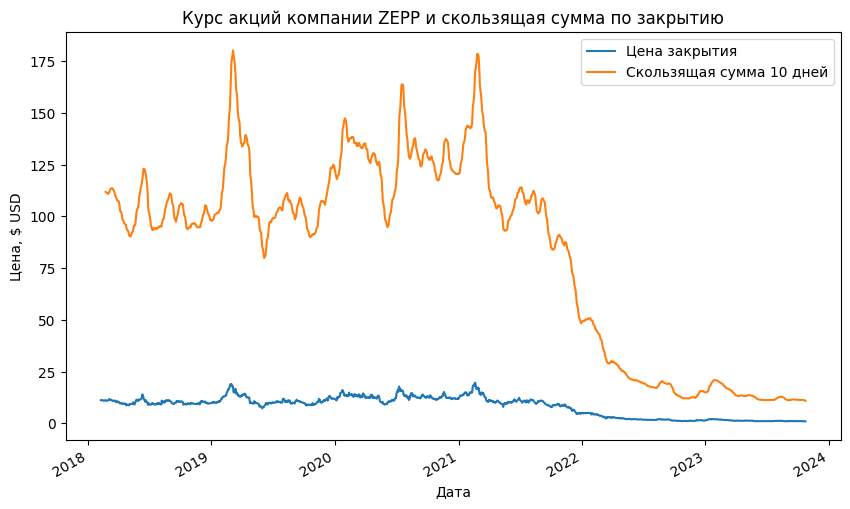

In [ ]:
#проверим как выглядит график акций и скользящая сумма
data2["Close"].plot(figsize=(10,6), label="Цена закрытия")
data2["Close"].rolling(window=10).sum().plot(figsize=(10, 6), label="Скользящая сумма 10 дней")
plt.xlabel('Дата')
plt.ylabel('Цена, $ USD')
plt.title("Курс акций компании ZEPP и скользящая сумма по закрытию")
plt.legend()
plt.show()

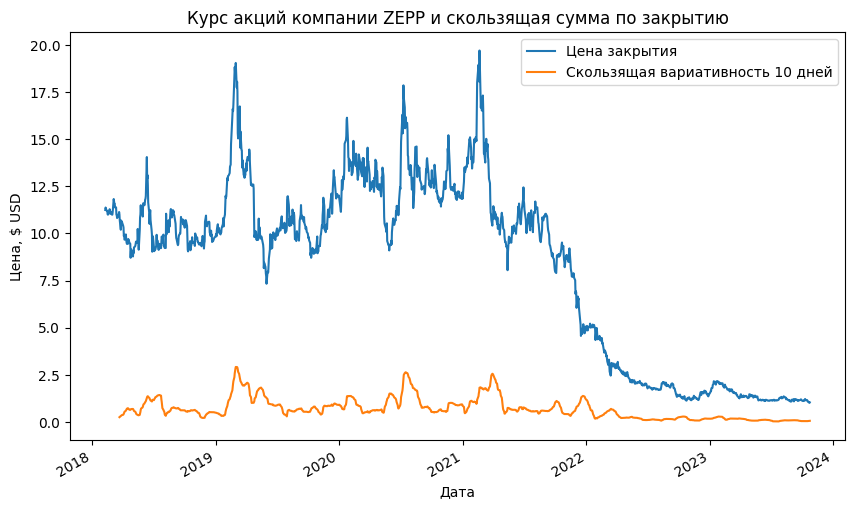

In [ ]:
#проверим как выглядит график акций и вариативность
data2["Close"].plot(figsize=(10,6), label="Цена закрытия")
data2["Close"].rolling(window=30).std().plot(figsize=(10, 6), label="Скользящая вариативность 10 дней")
plt.xlabel('Дата')
plt.ylabel('Цена, $ USD')
plt.title("Курс акций компании ZEPP и скользящая сумма по закрытию")
plt.legend()
plt.show()

In [ ]:
#построим график дневной волатильности в процентах
#вычислим дневную волатильность - ((открытие/закрытие)-1)*100%
data3 = (( data2['Open'] - data2['Close'] ) - 1) * 100
data3

Date
2018-02-08    -25.000000
2018-02-09    -94.000053
2018-02-12    -77.999973
2018-02-13    -80.999947
2018-02-14   -109.999943
                 ...    
2023-10-17   -100.000000
2023-10-18    -95.000005
2023-10-19   -100.000000
2023-10-20   -100.000000
2023-10-23    -97.000003
Length: 1436, dtype: float64

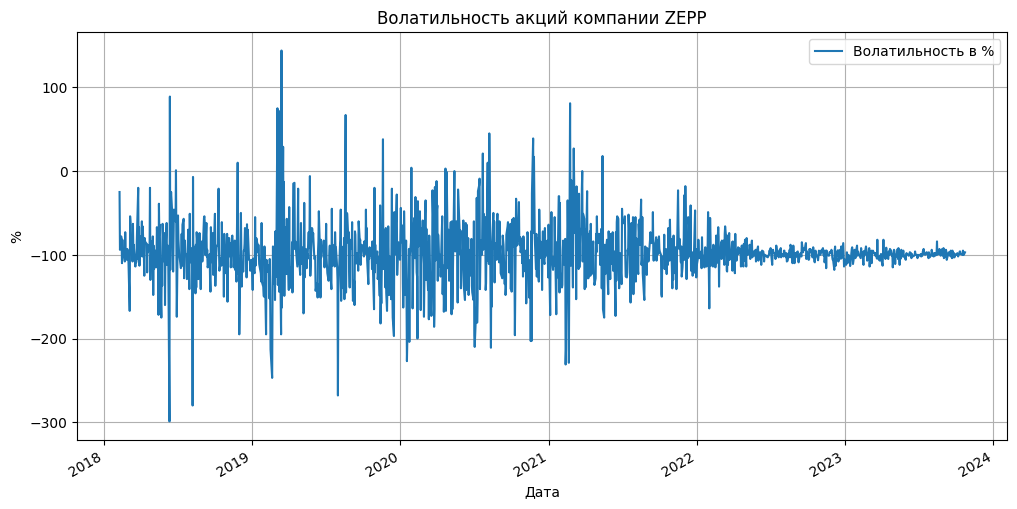

In [ ]:
#проверим как выглядит график днейвной волотильности
data3.plot(figsize=(12,6), label='Волатильность в %')
plt.xlabel('Дата')
plt.ylabel('%')
plt.title("Волатильность акций компании ZEPP")
plt.grid()
plt.legend()
plt.show()

In [ ]:
#низкая волотильность компании говорит о том, что рынок акций находилсся в те временные промежутки в покое.
#общий тренд стоимости акций по закрытию показывает на снижение стоимости к настоящему времени
#пик роста стоимости акций был в период с 2019 г. по 2020 г.

**6. Рассчитать индекс индустрии за последние 20 лет (можно меньше) на основе 10 крупнейших компаний. Сравнить динамику индекса и курса акций выбранной компании**

In [ ]:
# выведем 10 компаний с максиальной стоимостью в секторе "Технологии"
sort = sector_Technology[sector_Technology['IPO Year'] < 2012].sort_values(by='Market_Cap', ascending=False)
top =sort.head(10)
top

,Unnamed: 0,Name,Last Sale,Net Change,% Change,Market_Cap,Country,IPO Year,Volume,Sector,Industry,Z
Symbol,,,,,,,,,,,,
AAPL,20,Apple Inc. Common Stock,$134.3998,-2.7302,-1.991%,2330135028532,United States,1980,61884272,Technology,Computer Manufacturing,AAPL
MSFT,5037,Microsoft Corporation Common Stock,$246.065,-6.9250,-2.737%,1840328288364,United States,1986,18203583,Technology,Computer Software: Prepackaged Software,MSFT
GOOG,3396,Alphabet Inc. Class C Capital Stock,$2172.87,-55.6800,-2.498%,1430834627737,United States,2004,813637,Technology,Internet and Information Services,GOOG
GOOGL,3397,Alphabet Inc. Class A Common Stock,$2158.11,-65.1200,-2.929%,1421115169552,United States,2004,1190603,Technology,Internet and Information Services,GOOGL
TSM,7601,Taiwan Semiconductor Manufacturing Company Ltd.,$86.07,-2.6100,-2.943%,446341693334,Taiwan,1997,6130344,Technology,Semiconductors,TSM
NVDA,5455,NVIDIA Corporation Common Stock,$160.95,-8.7900,-5.179%,402375000000,United States,1999,32476541,Technology,Semiconductors,NVDA
AVGO,787,Broadcom Inc. Common Stock,$527.20,-14.0700,-2.599%,222160498927,United States,2009,1080721,Technology,Semiconductors,AVGO
ASML,662,ASML Holding N.V. New York Registry Shares,$500.03,-21.5000,-4.122%,201312884548,Netherlands,1995,695895,Technology,Industrial Machinery/Components,ASML
ADBE,127,Adobe Inc. Common Stock,$381.3899,-12.4501,-3.161%,180206727750,United States,1986,2140309,Technology,Computer Software: Prepackaged Software,ADBE


In [ ]:
#рассчитаем количество дней в 20 годах
start_day = date.fromisoformat("2013-10-13")
end_day = date.today()
days_btw1 = (end_day - start_day).days
days_btw1

3663

In [ ]:
#год выхода на рынок всех компаний нам подходит, поэтому выведем за неделю данные об акциях этих компаний
# возьмём 3355 дней, т.к. у топ 7 меньше количество дней, чем у всех других компаний, хотя сортировка сопадает
top1 = yf.download(tickers="AAPL", period="3550d", interval="1d", group_by="column")
top2 = yf.download(tickers="MSFT", period="3550d", interval="1d", group_by="column")
top3 = yf.download(tickers="GOOG", period="3550d", interval="1d", group_by="column")
top4 = yf.download(tickers="GOOGL", period="3550d", interval="1d", group_by="column")
top5 = yf.download(tickers="TSM", period="3550d", interval="1d", group_by="column")
top6 = yf.download(tickers="NVDA", period="3550d", interval="1d", group_by="column")
top7 = yf.download(tickers="AVGO", period="3550d", interval="1d", group_by="column")
top8 = yf.download(tickers="ASML", period="3550d", interval="1d", group_by="column")
top9 = yf.download(tickers="ADBE", period="3550d", interval="1d", group_by="column")
top10 = yf.download(tickers="ACN", period="3550d", interval="1d", group_by="column")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
#создадим таблицу из данных о компаниях: индекс(дата-время), десять колонок (компании), данные в таблице - э то цена по закрытию
new_table = pd.DataFrame()
new_table['AAPL'] = top1['Close']
new_table['MSFT'] = top2['Close']
new_table['GOOG'] = top3['Close']
new_table['GOOGL'] = top4['Close']
new_table['TSM'] = top5['Close']
new_table['NVDA'] = top6['Close']
new_table['AVGO'] = top7['Close']
new_table['ASML'] = top8['Close']
new_table['ADBE'] = top9['Close']
new_table['ACN'] = top10['Close']
new_table

,AAPL,MSFT,GOOG,GOOGL,TSM,NVDA,AVGO,ASML,ADBE,ACN
Date,,,,,,,,,,
2009-09-16,6.495357,25.200001,12.161665,12.219469,11.000000,3.985000,17.580000,30.309999,33.349998,36.439999
2009-09-17,6.591071,25.299999,12.247095,12.305305,10.890000,3.810000,16.639999,29.040001,32.840000,36.259998
2009-09-18,6.607857,25.260000,12.240619,12.298799,10.870000,3.805000,16.200001,29.330000,32.950001,35.840000
2009-09-21,6.572143,25.299999,12.378602,12.437437,10.770000,3.787500,16.610001,29.510000,32.849998,36.060001
2009-09-22,6.588571,25.770000,12.429910,12.488989,10.880000,3.795000,17.250000,29.950001,33.110001,36.939999
...,...,...,...,...,...,...,...,...,...,...
2023-10-17,177.149994,332.059998,140.990005,139.720001,91.000000,439.380005,884.400024,608.630005,560.090027,308.250000
2023-10-18,175.839996,330.109985,139.279999,137.960007,89.599998,421.959991,887.030029,583.250000,557.869995,303.769989
2023-10-19,175.460007,331.320007,138.979996,137.750000,92.910004,421.010010,867.830017,587.729980,555.739990,302.940002


In [ ]:
#проверим таблицу на info, describe,isnull. в новой таблице всё иделаьно, работаем с ней дальше
new_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3550 entries, 2009-09-16 to 2023-10-23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3550 non-null   float64
 1   MSFT    3550 non-null   float64
 2   GOOG    3550 non-null   float64
 3   GOOGL   3550 non-null   float64
 4   TSM     3550 non-null   float64
 5   NVDA    3550 non-null   float64
 6   AVGO    3550 non-null   float64
 7   ASML    3550 non-null   float64
 8   ADBE    3550 non-null   float64
 9   ACN     3550 non-null   float64
dtypes: float64(10)
memory usage: 434.1 KB


In [ ]:
#для расчета индекса индустрии возьмём цену по закрытию
prices = new_table[{'AAPL', 'MSFT', 'GOOG', 'GOOGL', 'TSM', 'NVDA', 'AVGO', 'ASML', 'ADBE','ACN'}]
print(prices)

                  ADBE        NVDA        TSM        GOOG        MSFT  \
Date                                                                    
2009-09-16   33.349998    3.985000  11.000000   12.161665   25.200001   
2009-09-17   32.840000    3.810000  10.890000   12.247095   25.299999   
2009-09-18   32.950001    3.805000  10.870000   12.240619   25.260000   
2009-09-21   32.849998    3.787500  10.770000   12.378602   25.299999   
2009-09-22   33.110001    3.795000  10.880000   12.429910   25.770000   
...                ...         ...        ...         ...         ...   
2023-10-17  560.090027  439.380005  91.000000  140.990005  332.059998   
2023-10-18  557.869995  421.959991  89.599998  139.279999  330.109985   
2023-10-19  555.739990  421.010010  92.910004  138.979996  331.320007   
2023-10-20  540.960022  413.869995  91.309998  136.740005  326.670013   
2023-10-23  540.409973  429.750000  91.110001  137.899994  329.320007   

                   ACN        AAPL        AVGO    

<ipython-input-64-de2e19178560>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  prices = new_table[{'AAPL', 'MSFT', 'GOOG', 'GOOGL', 'TSM', 'NVDA', 'AVGO', 'ASML', 'ADBE','ACN'}]


In [ ]:
weekly_avg_prices = []
for day in range(3550):
  daily_prices = [prices[company][day] for company in prices]
  avg_price = sum(daily_prices) / len(daily_prices)
  weekly_avg_prices.append(avg_price)
base_index = 100
weekly_index = [base_index]
for i in range(1, len(weekly_avg_prices)):
  index_change = (weekly_avg_prices[i] - weekly_avg_prices[i - 1]) / weekly_avg_prices[i - 1] * 100
  weekly_index.append(weekly_index[-1] + index_change)
# расчет индекса в новую созданную таблицу Indexes
Indexes = pd.DataFrame()
Ind = 0
for day, index_value in enumerate(weekly_index):
  Indexes.loc[Ind, "Index_ind"] = index_value
  Ind = Ind + 1
  print(f"День {day + 1}: Индекс = {index_value:.2f}")

День 1: Индекс = 100.00
День 2: Индекс = 98.51
День 3: Индекс = 98.23
День 4: Индекс = 98.70
День 5: Индекс = 100.27
День 6: Индекс = 99.56
День 7: Индекс = 98.82
День 8: Индекс = 98.06
День 9: Индекс = 100.62
День 10: Индекс = 99.53
День 11: Индекс = 100.09
День 12: Индекс = 97.05
День 13: Индекс = 97.44
День 14: Индекс = 98.34
День 15: Индекс = 100.23
День 16: Индекс = 100.06
День 17: Индекс = 101.17
День 18: Индекс = 101.91
День 19: Индекс = 102.75
День 20: Индекс = 103.30
День 21: Индекс = 103.88
День 22: Индекс = 103.61
День 23: Индекс = 103.16
День 24: Индекс = 103.08
День 25: Индекс = 102.85
День 26: Индекс = 103.26
День 27: Индекс = 103.45
День 28: Индекс = 103.37
День 29: Индекс = 102.82
День 30: Индекс = 101.36
День 31: Индекс = 98.85
День 32: Индекс = 100.84
День 33: Индекс = 98.64
День 34: Индекс = 99.03
День 35: Индекс = 99.18
День 36: Индекс = 100.72
День 37: Индекс = 102.76
День 38: Индекс = 102.99
День 39: Индекс = 105.71
День 40: Индекс = 105.19
День 41: Индекс = 105.4

In [ ]:
#проверим количество строк индексов индустриии типа данных для дальнейшей работы
Indexes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3550 entries, 0 to 3549
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index_ind  3550 non-null   float64
dtypes: float64(1)
memory usage: 184.5 KB


In [ ]:
#объеденим Индексы индустрии Indexes с таблицей new_table (с курсом акций по закрытию), при этой дни и счет дней будут совпадать
#чтобы объеденить таблицы, нужно сначала в таблице Indexes заменить индексы на реальные даты
Indexes.set_index(new_table.index, inplace=True)
Ind_table = new_table.join(Indexes)
Ind_table

,AAPL,MSFT,GOOG,GOOGL,TSM,NVDA,AVGO,ASML,ADBE,ACN,Index_ind
Date,,,,,,,,,,,
2009-09-16,6.495357,25.200001,12.161665,12.219469,11.000000,3.985000,17.580000,30.309999,33.349998,36.439999,100.000000
2009-09-17,6.591071,25.299999,12.247095,12.305305,10.890000,3.810000,16.639999,29.040001,32.840000,36.259998,98.506942
2009-09-18,6.607857,25.260000,12.240619,12.298799,10.870000,3.805000,16.200001,29.330000,32.950001,35.840000,98.226616
2009-09-21,6.572143,25.299999,12.378602,12.437437,10.770000,3.787500,16.610001,29.510000,32.849998,36.060001,98.697703
2009-09-22,6.588571,25.770000,12.429910,12.488989,10.880000,3.795000,17.250000,29.950001,33.110001,36.939999,100.268916
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17,177.149994,332.059998,140.990005,139.720001,91.000000,439.380005,884.400024,608.630005,560.090027,308.250000,438.590126
2023-10-18,175.839996,330.109985,139.279999,137.960007,89.599998,421.959991,887.030029,583.250000,557.869995,303.769989,437.096237
2023-10-19,175.460007,331.320007,138.979996,137.750000,92.910004,421.010010,867.830017,587.729980,555.739990,302.940002,436.682635


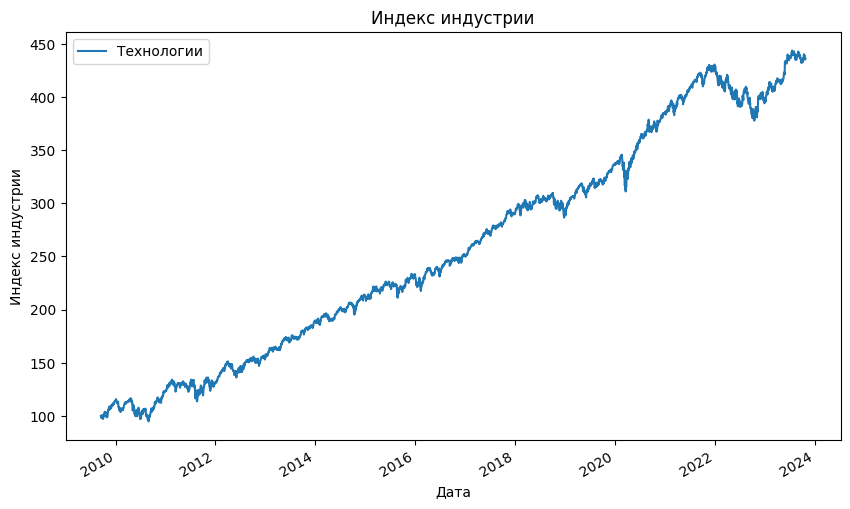

In [ ]:
#построим график индекса индустрии на основании курса закрытия для Топ10 компаний из сектора Технологии
Ind_table["Index_ind"].plot(figsize=(10, 6), label="Технологии")
plt.xlabel('Дата')
plt.ylabel('Индекс индустрии')
plt.title("Индекс индустрии")
plt.legend()
plt.show()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1436 entries, 2018-02-08 to 2023-10-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1436 non-null   float64
 1   High       1436 non-null   float64
 2   Low        1436 non-null   float64
 3   Close      1436 non-null   float64
 4   Adj Close  1436 non-null   float64
 5   Volume     1436 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 78.5 KB


In [ ]:
#Как видно из графика "Индекс индустрии (Технологии)", индекс за 15 лет имеет тендекцию к росту от начального значения
# Сравним "Индекс индустрии (Технологии)" Ind_table и нашей компании ZEPP (data2) за выбранный период
#для одинаковго количества данных выведем последние 1435 строк из Ind_table
data3 = Ind_table.tail(1436)

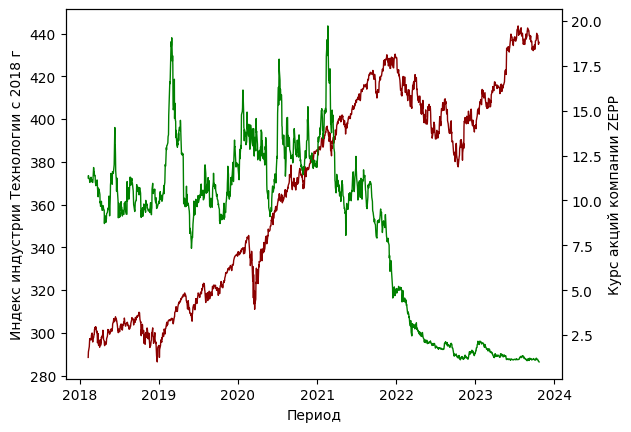

In [ ]:
#присвоим координаты для х и у1, у2
x = data3.index
y1 = data3.Index_ind
y2 = data2.Close
fig,ax = plt.subplots() # создаем объект графика
ax.plot(x , y1 , color='darkred', linewidth= 1 ) #первая линия графика
ax.set_xlabel('Период', fontsize= 10 ) # название оси Х
ax.set_ylabel('Индекс индустрии Технологии с 2018 г', fontsize= 10 ) # название оси Y
ax2 = ax.twinx () # вторая ось Y
ax2.plot(x , y2 , color='green', linewidth= 1)  #вторая линия графика
ax2.set_ylabel('Курс акций компании ZEPP', fontsize= 10 )
plt.show()

In [ ]:
#ВЫВОДЫ:
# после проведенного исследований по вычислению индекса индустрии Технологии  и курса акций выбранной компании за одинаковый период времени можно сделать сделующие выводы:
# 1. индекс индустрии Технологи имеет тенденцию к ростуза весь рассматриваемый период
# 2. курс акций компании по закрытию имеет тенденцию к снижению с 2021 г.
# 3. с период с 2022 г до 2023 г. оба исследуемых показателя снижались, а затем с 2023 г. - имели рост.
# 4. к концу 2023 г. оба исследуемых показателя имели тенденцию к замедлению или стабильности, т.е. нельзя сказать, что они росли или снижались
# 5. необходимо продолжить исследование

**7. Сравнить динамику показателей мировой экономики (ВВП, население, инфляция и т.д., не менее пяти) и динамику индекса**

Использовать данные:
https://datahub.io/collections/economic-data
страна Китай

* **7.1 Сравнение динамики ВВП Китая и индекса индустрии**

In [ ]:
gdp = pd.read_csv('/content/gdp_csv.csv')
gdp

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [ ]:
# посмотрим данные Китая и сгруппируем по годам и отфильруем с 2009 года
China = gdp[gdp["Country Name"] == "China"].groupby('Year').first().sort_values('Year')
gdp_China_fltr = China[China.index > 2008]
gdp_China_fltr

,Country Name,Country Code,Value
Year,,,
2009,China,CHN,5.109954e+12
2010,China,CHN,6.100620e+12
2011,China,CHN,7.572554e+12
2012,China,CHN,8.560547e+12
2013,China,CHN,9.607224e+12
2014,China,CHN,1.048237e+13
2015,China,CHN,1.106467e+13
2016,China,CHN,1.119915e+13


In [ ]:
#усредним данные курса по закрытию ТОП10 компаний ИНДЕКСА ИНДУСТРИИ за каждый год
# это не совсем правильно, т.к. за период одного года могут быть сильные изменения в положительную и отриуцательную сторону
# но из-за того, что ПОКАЗАТЕЛИ ВВП, население и уровнь инфляции являются результрующими за год, то есть необходимость приведения данных к единному виду
#сначала даты YYYY-MM-DD заменим на YYYY и сгруппируем данные за каждый год, усредняя
data4 = Ind_table #создадим новую таблицу
data4.index = pd.to_datetime(data4.index) #преобразуем формат даты индекса таблицы
data4['year'] = data4.index.year #создаем новый стобец year
gr_data4 = data4.groupby('year').mean() #группируем по годам через среднюю величину, т.к. сравнивать корректно по одинаковым данным
#отфильтруем показатели с ИНДЕКСОМ ИНДУСТРИИ с 2009 по 2016 год
gr_data4_fltr = gr_data4[gr_data4.index < 2017]
gr_data4_fltr

,AAPL,MSFT,GOOG,GOOGL,TSM,NVDA,AVGO,ASML,ADBE,ACN,Index_ind
year,,,,,,,,,,,
2009,6.978190,28.171067,13.826787,13.892506,10.483733,3.602800,16.278933,30.729467,35.076267,39.409467,105.159308
2010,9.280088,27.058571,13.340574,13.403981,10.401627,3.390794,21.515278,31.946706,31.211905,41.742857,108.789563
2011,13.000154,26.052341,14.171237,14.238593,12.570794,4.221885,32.407857,39.008849,30.124881,54.988849,128.322411
2012,20.573204,29.820960,16.010401,16.086498,14.809720,3.376970,34.477120,51.717000,32.670080,62.175360,146.895192
2013,16.879817,32.491905,22.023519,22.128197,17.795119,3.547282,38.542659,82.436944,46.803413,75.659802,172.122404
2014,23.066164,42.453492,27.990164,28.406118,20.313333,4.636766,73.486627,92.768809,67.453056,81.401905,198.667934
2015,30.010000,46.714286,30.100284,30.999411,22.713492,5.929563,125.593056,99.331310,80.967817,97.501071,221.446570
2016,26.151002,55.259325,37.174335,38.160661,26.786706,13.440298,157.190317,99.620357,97.325040,112.909881,238.877168


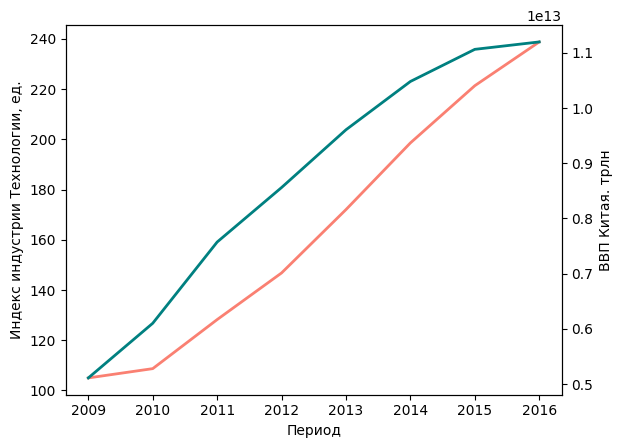

In [ ]:
#теперь мы имеет две таблицы China_fltr и gr_data4_fltr. Сравним ВВП Китая и индекс индустрии
#построим график
#присвоим координаты для х и у1, у2
x = gr_data4_fltr.index
y1 = gr_data4_fltr.Index_ind
y2 = gdp_China_fltr.Value
fig, ax = plt.subplots() # создаем объект графика
ax.plot(x , y1 , color='salmon', linewidth= 2 ) #первая линия графика
ax.set_xlabel('Период', fontsize= 10 ) # название оси Х
ax.set_ylabel('Индекс индустрии Технологии, ед.', fontsize= 10 ) # название оси Y
ax2 = ax.twinx () # вторая ось Y
ax2.plot(x , y2 , color='teal', linewidth= 2)  #вторая линия графика
ax2.set_ylabel('ВВП Китая. трлн', fontsize= 10 )
plt.show()

<ipython-input-89-9663de189a89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_data4_fltr['Value'] = gdp_China_fltr['Value']


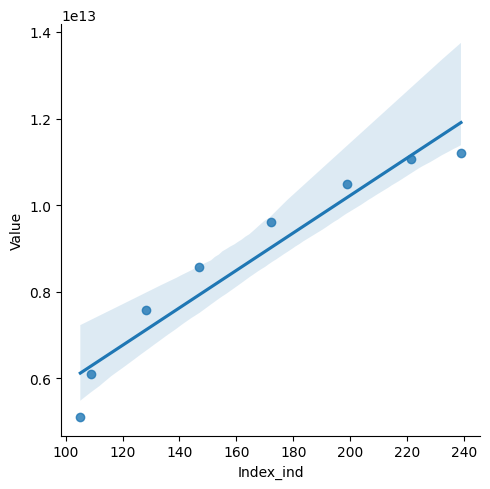

In [ ]:
#построим диаграмму регресси для двух категориальных данных
gr_data4_fltr['Value'] = gdp_China_fltr['Value']
sns.lmplot(x="Index_ind", y="Value", data=gr_data4_fltr)

In [ ]:
# Из графика и диаграммы видно, что в период с 2009 по 2016 гг. оба показателя имеют тенденцию к росту и их можно назвать зависимымы друг от друга

* **7.2 Сравнение динамики изменения численности населения Китая и индекса индустрии**

In [ ]:
 #загрузим данные о населении
population = pd.read_csv('/content/population_csv.csv')
pop_China = population[population["Country Name"] == "China"].groupby('Year').first().sort_values('Year')
pop_China_fltr = pop_China[pop_China.index > 2008]
pop_China_fltr

,Country Name,Country Code,Value
Year,,,
2009,China,CHN,1331260000
2010,China,CHN,1337705000
2011,China,CHN,1344130000
2012,China,CHN,1350695000
2013,China,CHN,1357380000
2014,China,CHN,1364270000
2015,China,CHN,1371220000
2016,China,CHN,1378665000
2017,China,CHN,1386395000


In [ ]:
gr_data4_fltr1 = gr_data4[gr_data4.index < 2019]

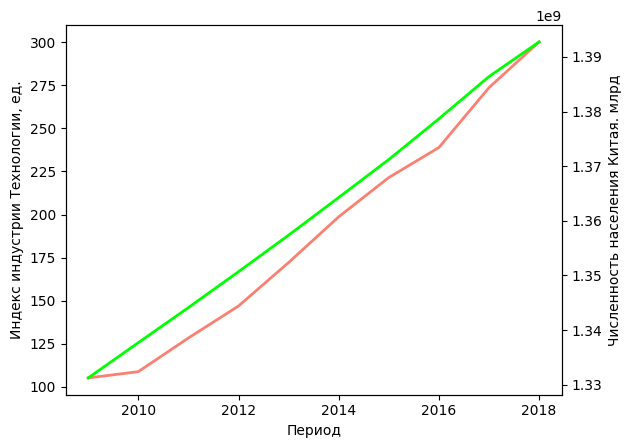

In [ ]:
#Сравним население Китая и индекс индустрии
x = gr_data4_fltr1.index
y1 = gr_data4_fltr1.Index_ind
y2 = pop_China_fltr.Value
fig, ax = plt.subplots() # создаем объект графика
ax.plot(x , y1 , color='salmon', linewidth= 2 ) #первая линия графика
ax.set_xlabel('Период', fontsize= 10 ) # название оси Х
ax.set_ylabel('Индекс индустрии Технологии, ед.', fontsize= 10 ) # название оси Y
ax2 = ax.twinx () # вторая ось Y
ax2.plot(x , y2 , color='lime', linewidth= 2)  #вторая линия графика
ax2.set_ylabel('Численность населения Китая. млрд', fontsize= 10 )
plt.show()

<ipython-input-93-9bf348b00fb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_data4_fltr1['Value'] = pop_China_fltr['Value']


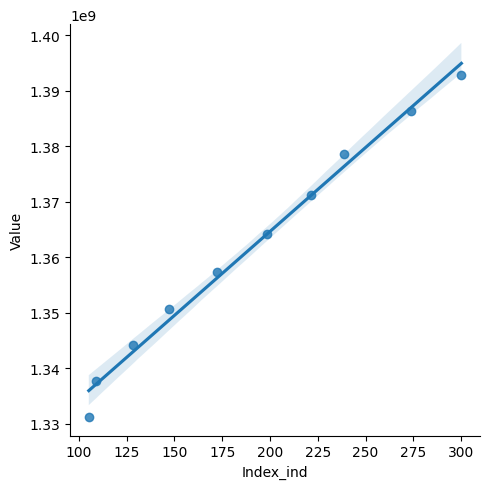

In [ ]:
#построим диаграмму регресси для двух категориальных данных
gr_data4_fltr1['Value'] = pop_China_fltr['Value']
sns.lmplot(x="Index_ind", y="Value", data=gr_data4_fltr1)

In [ ]:
# Из графика и диаграммы видно, что в период с 2009 по 2018 гг. оба показателя имеют тенденцию к росту и их можно назвать зависимымы друг от друга

* **7.3 Сравнение динамики изменения инфляции Китая и индекса индустрии**

In [ ]:
#загрузим данные о инфляции
inflation = pd.read_csv('/content/inflation-gdp_csv.csv')
infl_China = inflation[inflation["Country"] == "China"].groupby('Year').first().sort_values('Year')
infl_China_fltr = infl_China[infl_China.index > 2008]
infl_China_fltr

,Country,Country Code,Inflation
Year,,,
2009,China,CHN,-0.133898
2010,China,CHN,6.944445
2011,China,CHN,8.152151
2012,China,CHN,2.392484
2013,China,CHN,2.225234
2014,China,CHN,0.828374
2015,China,CHN,0.093333
2016,China,CHN,1.221800


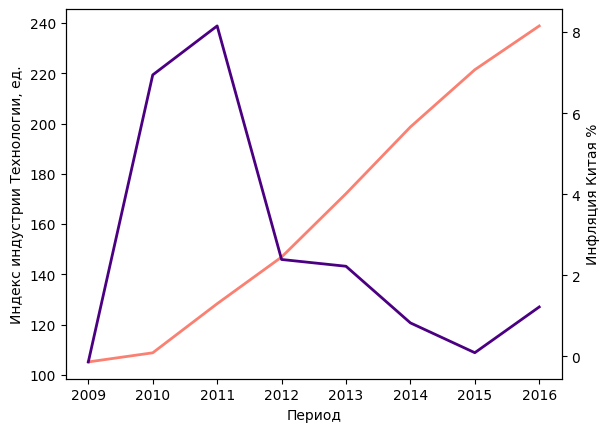

In [ ]:
#Сравним инфляцию Китая и индекс индустрии
x = gr_data4_fltr.index
y1 = gr_data4_fltr.Index_ind
y2 = infl_China_fltr.Inflation
fig, ax = plt.subplots() # создаем объект графика
ax.plot(x , y1 , color='salmon', linewidth= 2 ) #первая линия графика
ax.set_xlabel('Период', fontsize= 10 ) # название оси Х
ax.set_ylabel('Индекс индустрии Технологии, ед.', fontsize= 10 ) # название оси Y
ax2 = ax.twinx () # вторая ось Y
ax2.plot(x , y2 , color='indigo', linewidth= 2)  #вторая линия графика
ax2.set_ylabel('Инфляция Китая %', fontsize= 10 )
plt.show()

<ipython-input-109-8d14f377a2b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_data4_fltr['Inflation'] = infl_China_fltr['Inflation']


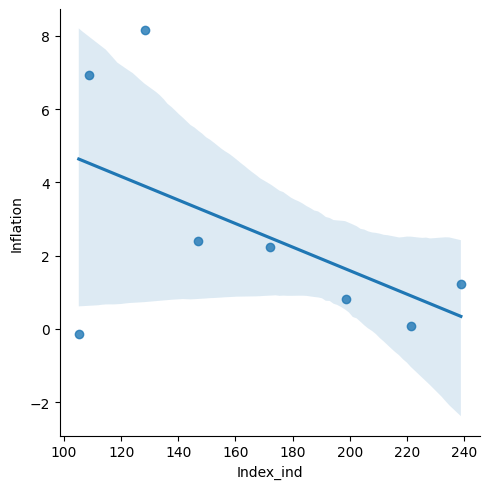

In [ ]:
#построим диаграмму регресси для двух категориальных данных
gr_data4_fltr['Inflation'] = infl_China_fltr['Inflation']
sns.lmplot(x="Index_ind", y="Inflation", data=gr_data4_fltr)

In [ ]:
# Из графика видно, что в период с 2009 по 2016 гг. нет какойто общей тенденции
#однако, в периоды 2009-20111 гг. и 2015-2016 гг можно сказать что инфляция и индекст индустрии растут,
# а в период 2011-2015 гг. инфляция снижается
#скорее всего можно сделать вывод о том, что конекретно данный индекс индустрии незначительно связан с Китаем
#регрессионный аналиг двух признаков показал, что с ростом индекса индустрии инфляция снижается,  и есть зависимость, но есть выпадающие интервалы

* **7.4 Сравнение динамики паритета покупательской способности (PPP) Китая и индекса индустрии**

In [ ]:
#загрузим данные о PPP
ppp = pd.read_csv('/content/ppp-gdp_csv.csv')
ppp_China = ppp[ppp["Country"] == "China"].groupby('Year').first().sort_values('Year')
ppp_China_fltr = ppp_China[ppp_China.index > 2008]
ppp_China_fltr

,Country,Country ID,PPP
Year,,,
2009,China,CN,3.131183
2010,China,CN,3.308221
2011,China,CN,3.505536
2012,China,CN,3.524482
2013,China,CN,3.545648
2014,China,CN,3.512139
2015,China,CN,3.459640


In [ ]:
gr_data4_fltr2 = gr_data4[gr_data4.index < 2016]

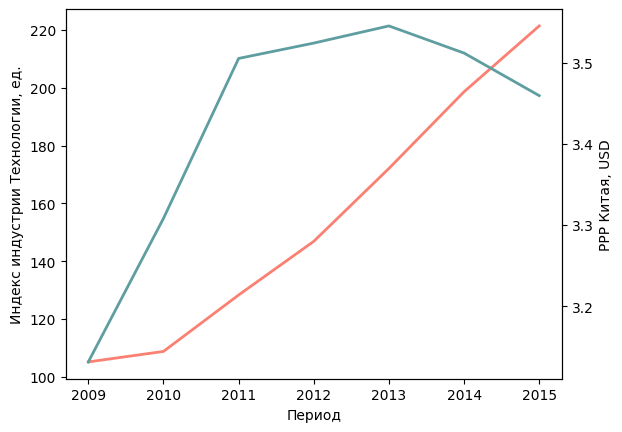

In [ ]:
#Сравним PPP Китая и индекс индустрии
x = gr_data4_fltr2.index
y1 = gr_data4_fltr2.Index_ind
y2 = ppp_China_fltr.PPP
fig, ax = plt.subplots() # создаем объект графика
ax.plot(x , y1 , color='salmon', linewidth= 2 ) #первая линия графика
ax.set_xlabel('Период', fontsize= 10 ) # название оси Х
ax.set_ylabel('Индекс индустрии Технологии, ед.', fontsize= 10 ) # название оси Y
ax2 = ax.twinx () # вторая ось Y
ax2.plot(x , y2 , color='cadetblue', linewidth= 2)  #вторая линия графика
ax2.set_ylabel('PPP Китая, USD', fontsize= 10 )
plt.show()

<ipython-input-108-331f297fccb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_data4_fltr2['PPP'] = ppp_China_fltr['PPP']


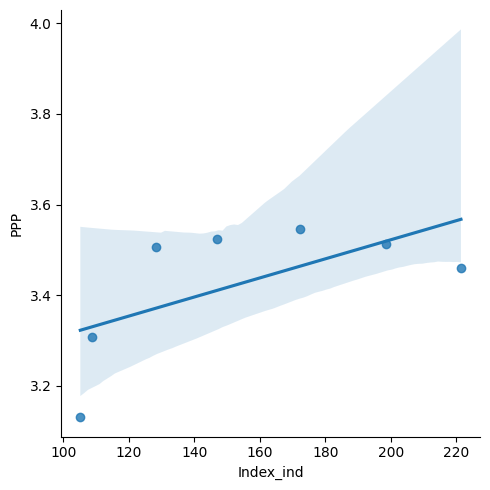

In [ ]:
#построим диаграмму регресси для двух категориальных данных
gr_data4_fltr2['PPP'] = ppp_China_fltr['PPP']
sns.lmplot(x="Index_ind", y="PPP", data=gr_data4_fltr2)

In [ ]:
# Из графика видно, что паритет покупательской способноти Китая в период с 2009 г. по 2013 г. только увеличивался
# в целом, модно сказать что обе исследуемые величины меют рост и зависимы

* **7.5 Сравнение динамики роста населения Китая и индекса индустрии**

In [ ]:
#загрузим данные о росте населения Китая
pop_est = pd.read_csv('/content/population-estimates_csv.csv')
pop_est_China = pop_est[pop_est["Region"] == "China"].groupby('Year').first().sort_values('Year')
pop_est_China_fltr = pop_est_China[pop_est_China.index > 2008]
pop_est_China_fltr

,Region,Country Code,Population
Year,,,
2009,China,156,1352068.091
2010,China,156,1359755.102
2011,China,156,1367480.264
2012,China,156,1375198.619
2013,China,156,1382793.212
2014,China,156,1390110.388
2015,China,156,1397028.553


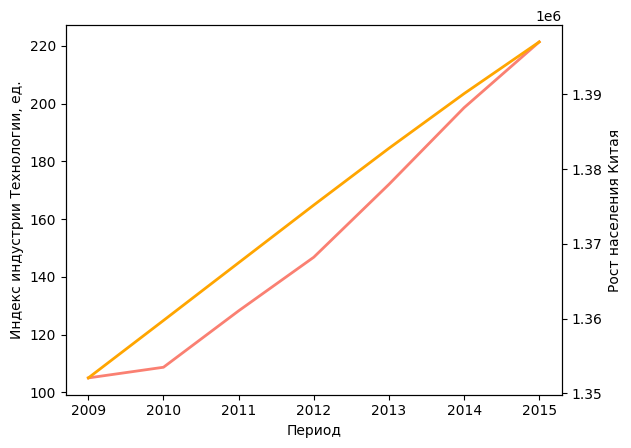

In [ ]:
#Сравним рост наседения Китая и индекс индустрии
x = gr_data4_fltr2.index
y1 = gr_data4_fltr2.Index_ind
y2 = pop_est_China_fltr.Population
fig, ax = plt.subplots() # создаем объект графика
ax.plot(x , y1 , color='salmon', linewidth= 2 ) #первая линия графика
ax.set_xlabel('Период', fontsize= 10 ) # название оси Х
ax.set_ylabel('Индекс индустрии Технологии, ед.', fontsize= 10 ) # название оси Y
ax2 = ax.twinx () # вторая ось Y
ax2.plot(x , y2 , color='orange', linewidth= 2)  #вторая линия графика
ax2.set_ylabel('Рост населения Китая', fontsize= 10 )
plt.show()

<ipython-input-106-a4cf6c92314c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_data4_fltr2['Population'] = pop_est_China_fltr['Population']


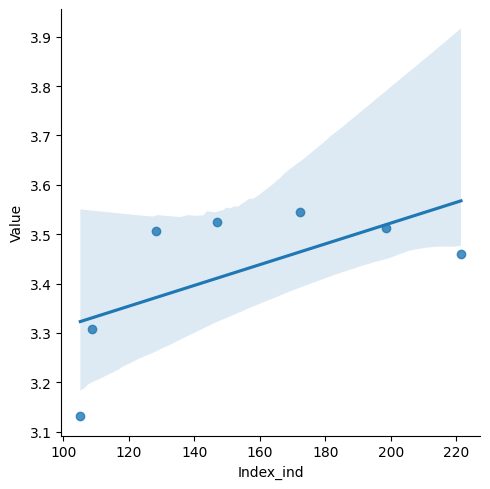

In [ ]:
#построим диаграмму регресси для двух категориальных данных
gr_data4_fltr2['Population'] = pop_est_China_fltr['Population']
sns.lmplot(x="Index_ind", y="Value", data=gr_data4_fltr2)

In [ ]:
#из графика видно, что оба показателя имееют тренд к росту

**8. Сравнить курс акций компании и динамику показателей национальной экономики (не менее пяти)**

Использовать данные: https://microdata.worldbank.org/index.php/catalog/history/

* **8.1 Сравним курс акций компании ZEPP за 2022 г, как выборочные значения и опрос людей относительно некой инстанции**

In [ ]:
#ыведем курс акций нашей компании ZEPP
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-08,12.00,12.00,10.530,11.250,10.881147,5921500
2018-02-09,11.44,11.60,11.000,11.380,11.006886,1690900
2018-02-12,11.43,11.73,11.210,11.210,10.842459,887800
2018-02-13,11.39,11.39,11.100,11.200,10.832787,485100
2018-02-14,11.10,11.26,10.860,11.200,10.832787,373500
...,...,...,...,...,...,...
2023-10-23,1.03,1.07,1.000,1.000,1.000000,68700
2023-10-24,1.08,1.09,1.020,1.030,1.030000,36300
2023-10-25,1.03,1.03,1.010,1.030,1.030000,24100


In [ ]:
#загрузимф файл https://microdata.worldbank.org/index.php/catalog/5658/get-microdata
#был проведетпорос служащих разных компанийв по отношению к мировому
china_22 = pd.read_csv('/content/china_cos_fy22_data.csv')
china_22 = china_22.dropna()
china_22

,id,Method,UserLanguage,Q1,Q2,Q3,a1,a2,a3_1,a3_2,...,g5_5,g5_6,g5_7,g5_8,g5_9,h1,h2,h3,h4,h5
0,101,2,ZH-S,15,1,1.0,1,2,0,0,...,3.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0
1,102,2,ZH-S,9,1,1.0,1,1,1,0,...,4.0,-99.0,-99.0,-99.0,-99.0,1.0,1.0,-99.0,4.0,4.0
2,103,2,ZH-S,17,1,1.0,1,1,1,0,...,4.0,4.0,2.0,4.0,3.0,13.0,2.0,3.0,3.0,4.0
4,105,2,ZH-S,9,1,1.0,1,3,0,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,13.0,1.0,1.0,2.0,4.0
5,106,2,ZH-S,9,1,1.0,3,3,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,473,2,ZH-S,1,1,1.0,1,1,0,0,...,4.0,4.0,3.0,4.0,3.0,2.0,2.0,2.0,3.0,1.0
379,480,2,ZH-S,2,1,1.0,1,3,0,0,...,2.0,3.0,2.0,3.0,2.0,10.0,2.0,3.0,4.0,1.0
382,483,2,ZH-S,3,1,1.0,1,1,1,0,...,2.0,2.0,2.0,2.0,2.0,13.0,2.0,1.0,4.0,4.0
386,487,2,ZH-S,3,1,1.0,1,1,1,0,...,4.0,4.0,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0


In [ ]:
#сравним Q1 по количеству людей и курст акций за 2022 год по дням через регрессионный анализ
data_2022 = pd.DataFrame(data = data2.Close[data2.index > "2022-01-01"]) #выведем курс акций с начала 2022 г
data_2022 = pd.DataFrame(data = data_2022.Close[data_2022.index < "2023-01-01"])
data_2022 = data_2022.reset_index(drop=True).head(220) #заменим индексы на счет
data_2022

,Close
0,5.09
1,4.97
2,4.85
3,5.03
4,5.04
...,...
215,1.17
216,1.19
217,1.27
218,1.22


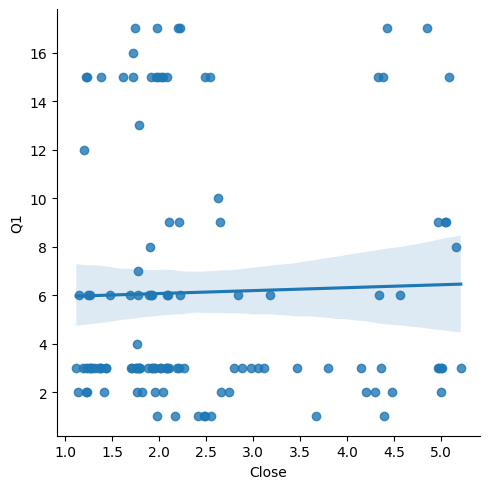

In [ ]:
#из таблицы опроса china_22 возьмем данные первых 220 человека и колонки Q1
#построим диаграмму регрессионного анализа проверить зависимость
data_2022['Q1'] = china_22['Q1']
sns.lmplot(x="Close", y="Q1", data=data_2022)

In [ ]:
#из диаграммы видно, что между курсом акций и опросом 220 человек покомпании Q1 нельзя сказать о существует зависимости
#ну или зависимость есть только среди нескольких данных

* **8.2 Сравним курс акций компании ZEPP и загрязнение воздуха в N-городах Китая за 2020 г**

In [ ]:
china_2020 = pd.read_csv('/content/AirPollutionConcentrationData2_pred_eq_stage1.csv')
china_2020 = china_2020.dropna()
china_2020

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
5,lncpopden,log city population density,0.3463,0.0540,***,0.5541,0.5729,0.3574,0.0515,***,0.5136,0.6749
6,lncpop,log city population,-0.0249,0.0083,***,-0.0441,-0.0306,-0.0084,0.0053,,-0.0126,-0.0073
7,lnypopden,log country population density,-1.0078,0.5564,*,-1.9086,-0.6931,-0.3526,0.3432,,-0.5297,-0.6260
8,lytrend,trend,-0.0764,0.0371,**,-0.3727,-0.2161,-0.0519,0.0241,**,-0.2126,-0.1089
9,lncgdpar,log city gdp per area,-0.2281,0.0465,***,-0.3951,-0.4210,-0.2236,0.0460,***,-0.3686,-0.5434
...,...,...,...,...,...,...,...,...,...,...,...,...
125,lunsd_818,Egypt,20.5242,4.4579,***,0.5394,0.5394,12.1935,2.8510,***,0.1896312,0.1554
126,lunsd_826,United Kingdom,20.6749,4.8013,***,1.7982,1.7982,11.5764,3.1317,***,1.340057,1.0958
127,lunsd_840,USA,19.1529,4.3875,***,11.3658,11.3658,10.7958,2.7899,***,5.852525,4.7208
128,lunsd_858,Uruguay,20.7821,4.3295,***,0.7722,0.7722,13.3266,2.7541,***,0.4143847,0.3409


In [ ]:
china_2020= china_2020[china_2020["C2"] == "China"] #вывод данных Китая
china_2020

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
78,lunsd_156,China,21.4765,4.6478,***,4.1372,4.1372,12.1053,3.0005,***,2.4141,2.0238


In [ ]:
china_20 = china_2020.drop(['C1', 'C2', 'C5', 'C10'], axis=1) #удалим лишние столбцы
china_20

,C3,C4,C6,C7,C8,C9,C11,C12
78,21.4765,4.6478,4.1372,4.1372,12.1053,3.0005,2.4141,2.0238


In [ ]:
#цикл для преобразования таблицы china_2020 в другой тип данных float
for column in china_20:
  if china_20[column].dtype == 'object':
    china_20[column] = china_20[column].astype(float)

In [ ]:
#перевернем таблицу с данными по загрязнению воздуха
china_20 = china_20.transpose()
china_20.info()
china_20

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, C3 to C12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   78      8 non-null      float64
dtypes: float64(1)
memory usage: 428.0+ bytes


,78
C3,21.4765
C4,4.6478
C6,4.1372
C7,4.1372
C8,12.1053
C9,3.0005
C11,2.4141
C12,2.0238


In [ ]:
china_20 = china_20.reset_index(drop=True) #заменим индексы на счет
china_20

,78
0,21.4765
1,4.6478
2,4.1372
3,4.1372
4,12.1053
5,3.0005
6,2.4141
7,2.0238


In [ ]:
#т.к по загрязнению воздуха 8 значений, то возьмем 8 среднемесячных значений из курса акций за 2020г
new_data2 = data2.resample('M').mean()
new_2020 = new_data2.loc[new_data2.index.year == 2020] # оставим данные только 2020 г
new_2020.index = new_2020.index.strftime('%Y') #выведем только год
new_2020 = new_2020.reset_index(drop=True).head(8)
new_2020

,Open,High,Low,Close,Adj Close,Volume
0,13.378095,13.919143,12.957048,13.484762,13.042638,598571.428571
1,13.696842,14.158842,13.348895,13.651579,13.203986,395021.052632
2,13.445455,13.890500,12.828046,13.468182,13.026602,483377.272727
3,12.774762,13.143714,12.434905,12.744286,12.326440,302647.619048
4,11.172000,11.415950,10.770750,11.036500,10.674647,365505.000000
5,10.704545,11.093045,10.476364,10.796364,10.442384,375790.909091
6,15.156818,15.667318,14.716136,15.107727,14.612392,564754.545455
7,13.274762,13.644191,12.793714,13.176191,12.744184,533361.904762


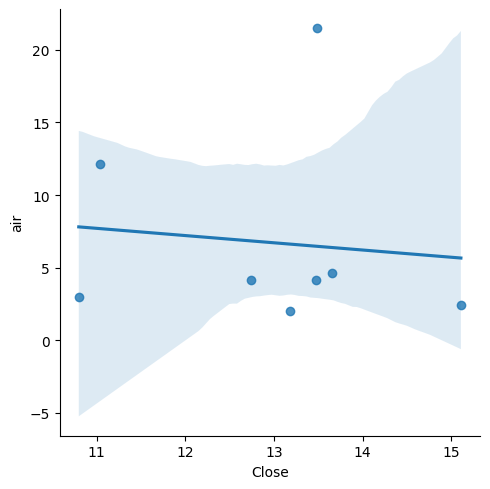

In [ ]:
#из двух полученных таблиц можно сравнить, есть ли зависимость от загрязнения воздуха в Китае и курса акций ZEPP
#построим диаграмму регрессионного анализа проверить зависимость
new_2020['air'] = china_20[78]
sns.lmplot(x='Close', y='air', data=new_2020)

In [ ]:
#по графику из-за наличия данных нет ясности, с ростом курса акций повышается ли загразнение воздуха,
# но по некоторым точкам можно сказать, что это так

* **8.3 Сравним курс акций компании ZEPP и Измерение международной квалифицированной миграции 1990-2000 годов**

In [ ]:
ch = pd.read_excel('/content/DataSet_BDwith_age_of_entry_DocquierRapoport.xls')
ch

,Measuring international skilled migration,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,New Estimates Controlling for age of entry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Michel Beine, Frédéric Docquier and Hillel Rap...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"This dataset, a product of the Trade Team - De...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
194,Venezuela,0.036714,0.033968,0.032812,0.030053,0.029493,0.026565,0.026268,0.023193
195,Vietnam,0.245045,0.270715,0.211207,0.232212,0.17531,0.190105,0.14726,0.157674
196,Yemen,0.05406,0.060403,0.050378,0.056815,0.047704,0.054182,0.042078,0.048835
197,Zambia,0.167164,0.167724,0.154547,0.157306,0.147229,0.150885,0.140908,0.144880


In [ ]:
ch = ch[ch["Measuring international skilled migration"] == "China"] #вывод данных Китая
ch

,Measuring international skilled migration,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
43,China,0.030783,0.038308,0.028725,0.035797,0.026654,0.03319,0.024692,0.030606


Большенство данных из рекомендуемого источника не особо представляют значимость для сравнения с курсом акций компании. к тому же для получения большенства данных нужна регистрация на третий источник и ожидания проверки и одобрения на использования данных, которые будут доступны после проверки заполнренной формы

**9. Сделать предсказание курса акций с помощью модели ARIMA, на следующие две недели. Подобрать наилучшие параметры модели**

In [ ]:
data2.info() #столбец с датами имеет формат datetime и его не нужно преобразовывать

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1437 entries, 2018-02-08 to 2023-10-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1437 non-null   float64
 1   High       1437 non-null   float64
 2   Low        1437 non-null   float64
 3   Close      1437 non-null   float64
 4   Adj Close  1437 non-null   float64
 5   Volume     1437 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 78.6 KB


In [ ]:
#оставим нужные столбцы для работы index(date) и Close (курс акций по закрытию)
data5 = data2[['Close']]
data5

,Close
Date,
2018-02-08,11.25
2018-02-09,11.38
2018-02-12,11.21
2018-02-13,11.20
2018-02-14,11.20
...,...
2023-10-18,1.07
2023-10-19,1.07
2023-10-20,1.05


In [ ]:
#проверим, будет ли являться ряд стационарным или нестационарным
#Если p-value меньше α = 0,05, то мы можем отвергнуть нулевую гипотезу и временной ряд является стационарным
from statsmodels.tsa.stattools import adfuller
result = adfuller(data5["Close"])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.067045
p-value: 0.728033
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [ ]:
#чтобы применить АРИМА, ряд нужно сдлелать стационарным
#применим дифферинциарования для Close
# Преобразуем для удаления тренда
data5["Разность1"] = data5["Close"] - data5["Close"].rolling(window=2).mean()
# Преобразуем для удаления разницы между текущим и предыдущим значением
data5["Разность2"] = data5["Разность1"].diff()
data6 = data5.dropna() #удалим пропуск
data6 #просмотр

<ipython-input-67-4523abafb57c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5["Разность1"] = data5["Close"] - data5["Close"].rolling(window=2).mean()
<ipython-input-67-4523abafb57c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5["Разность2"] = data5["Разность1"].diff()


,Close,Разность1,Разность2
Date,,,
2018-02-12,11.21,-0.085,-0.150000
2018-02-13,11.20,-0.005,0.080000
2018-02-14,11.20,0.000,0.005000
2018-02-15,11.02,-0.090,-0.090000
2018-02-16,11.00,-0.010,0.079999
...,...,...,...
2023-10-18,1.07,-0.020,0.000000
2023-10-19,1.07,0.000,0.020000
2023-10-20,1.05,-0.010,-0.010000


<Axes: xlabel='Date'>

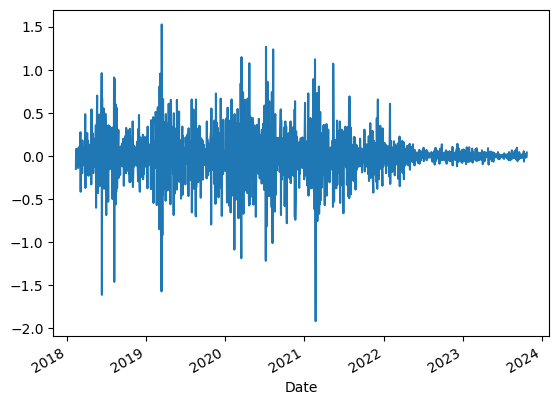

In [ ]:
data6.Разность2.plot() #посмотрим ряд на графике

In [ ]:
#проверим, будет ли являться ряд ПЕРВАЯ РАЗНОСТЬ стационарным или нестационарным
#Если p-value меньше α = 0,05, то мы можем отвергнуть нулевую гипотезу временной ряд является стационарным
adfuller(data6.Разность2)
print("p-value=", adfuller(data6.Разность2)[1]) #p_value меньше 5% - ряд стационарный

p-value= 8.433282898285e-25


In [ ]:
#т.к ситационарный ряд значительно отличается от реального, попробуем сделать модель от фактического ряда -цена акций по закрытию

In [ ]:
from statsmodels.tsa.arima.model import ARIMA #импортируем необходимую фанкцию из библиотеки

In [ ]:
# Перебираем разные значения p, d, q
best_aic = np.inf
best_order = None

for p in range(5):  # Задаем диапазон для p
    for d in range(5):  # Задаем диапазон для d
        for q in range(5):  # Задаем диапазон для q
            try:
                # Создаем и обучаем модель ARIMA
                model = ARIMA(data6.Close, order=(p, d, q))
                model_fit = model.fit()

                # Вычисляем AIC
                aic = model_fit.aic

                # Если текущее AIC лучше предыдущего, сохраняем параметры
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Лучшие параметры модели
print(f"Лучший AIC: {best_aic}")

Лучший AIC: 1360.6120337337848


In [ ]:
print(f"Лучший порядок (p, d, q): {best_order}")

Лучший порядок (p, d, q): (2, 1, 2)


In [ ]:
#создадим модель АРИМА и обучим ее на исходных данных
p = 2
d = 1
q = 2
model = ARIMA(data6.Close, order=(p, d, q))
results = model.fit()

# сделаем предсказание на 14 дней
forecast_steps = 14
forecasted_values = results.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [ ]:
forecasted_values.to_list()

[1.0338373791965203,
 1.028149464083989,
 1.0241585767402799,
 1.0287850268597807,
 1.0328017814338586,
 1.029118674748017,
 1.025176884559897,
 1.028031788880266,
 1.0318212065604553,
 1.0296844353970382,
 1.0261045669790747,
 1.02762668022185,
 1.03095706721676,
 1.0299537695831158]

In [ ]:
data_p = pd.date_range(start=data6.index[-1], periods=forecast_steps+1)[1:]
data_p

DatetimeIndex(['2023-10-25', '2023-10-26', '2023-10-27', '2023-10-28',
               '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-03', '2023-11-04', '2023-11-05',
               '2023-11-06', '2023-11-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
perspective = pd.DataFrame(data=forecasted_values.to_list(), index=data_p, columns=['future'])
perspective #просмотр предсказания

,future
2023-10-25,1.033837
2023-10-26,1.028149
2023-10-27,1.024159
2023-10-28,1.028785
2023-10-29,1.032802
2023-10-30,1.029119
2023-10-31,1.025177
2023-11-01,1.028032
2023-11-02,1.031821
2023-11-03,1.029684


<Axes: >

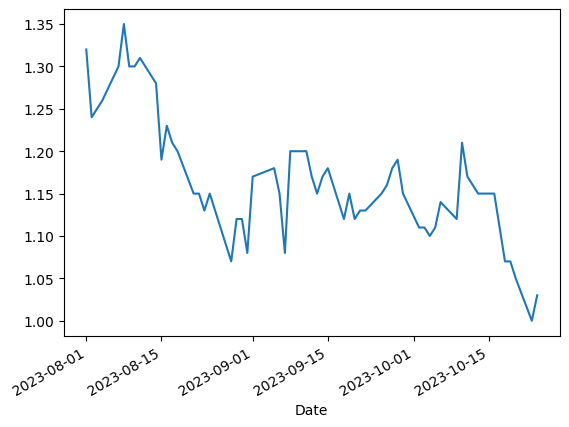

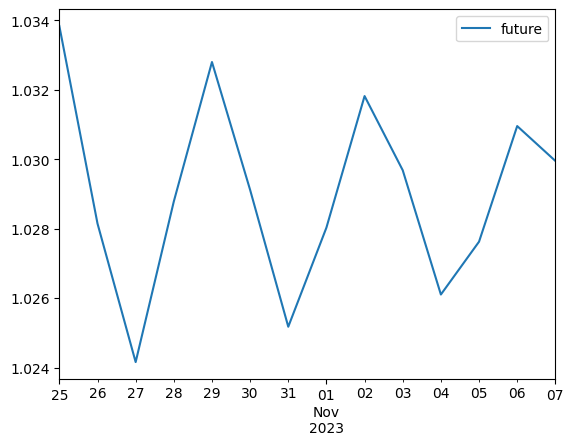

In [ ]:
#Построим график, отображающий ретроспективу курса акций компании ZEPP по закрытию c августа 2023
data6['Close'].loc["2023-08":].plot()
perspective.plot()

In [ ]:
kurs = pd.DataFrame(data = data6.Close[data6.index > "2023-01-01"]) #выведем курс акций с начала 2023 г

In [ ]:
kurs_f = pd.concat([kurs, perspective], axis=1)
kurs_f

,Close,future
2023-01-03,1.57,NaN
2023-01-04,1.64,NaN
2023-01-05,1.64,NaN
2023-01-06,1.78,NaN
2023-01-09,1.80,NaN
...,...,...
2023-11-03,NaN,1.029684
2023-11-04,NaN,1.026105
2023-11-05,NaN,1.027627
2023-11-06,NaN,1.030957


<Axes: >

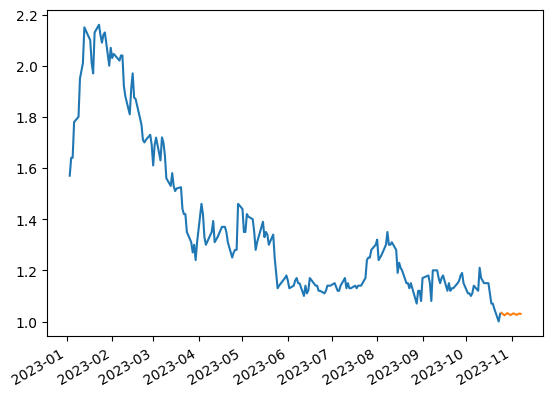

In [ ]:
#Построим гафик предсказания на 14 дней
kurs_f.Close.plot()
kurs_f.future.plot()

In [ ]:
#ВЫВОД:
#Таким образом можно сделать вывод, что в ближайщие 2 недели курс акций будет примерно на одном уровне (~1 USD)
#при этом курс снизится, что соответсвует общему тренду ретроспективы

**10. Загрузить в блокнот изображение логотипа компании. Выполнить с изображением 3-4 операции, используя любые функции из библиотеки OpenCV (кроме изменения контраста и яркости)**

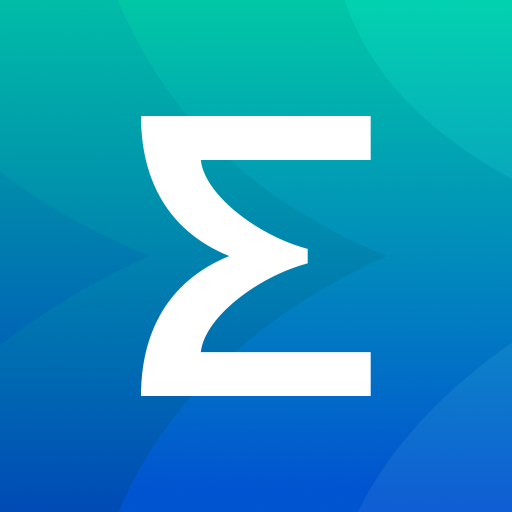

In [ ]:
#Загрузка из интернета
from google.colab.patches import cv2_imshow
response = urlopen("https://play-lh.googleusercontent.com/Hb2rqfgDJ7R3FdgO0F1W-GNto4BxorygjHGkYMsdHageFGH778IXmLUswRDbiUhmWqA")
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
#просмотр картинки
cv2_imshow(image)

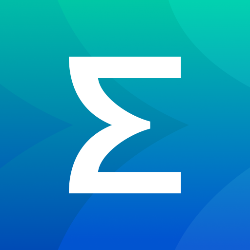

In [ ]:
# 1. изменим размер изображения
resized_img = cv2.resize(image, (250, 250))
cv2_imshow(resized_img)

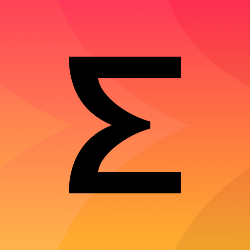

In [ ]:
# 2. Инвертируем цвета
bw_img = cv2.bitwise_not(resized_img)
cv2_imshow(bw_img)

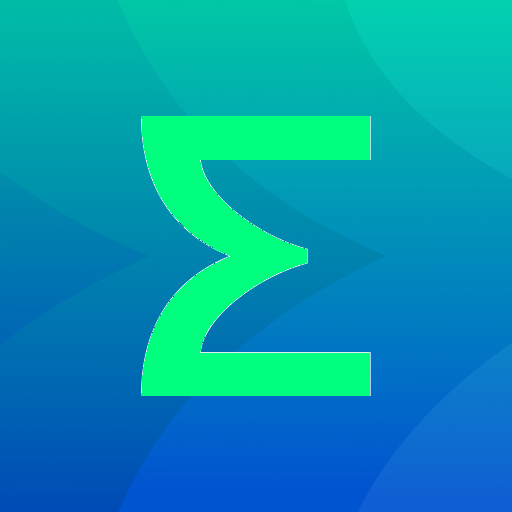

In [ ]:
# 3. заменим черный цвет второй на голубой
bw2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # преобразуем первоначальную картинку в оттеки серого
mask = bw2 == 0 # создание маски для черного цвета преыдущей картинки
image[mask] = (255, 128, 0) #замена черного на голубой
cv2_imshow(image) #результат